In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Handle large data sets by not embedding them in the notebook
alt.data_transformers.enable('data_server')

# Save a PNG blob as a backup for when the Altair plots do not render
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [12]:
df = pd.read_excel("Blue Chip Credit Dataset.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10168 non-null  int64  
 1   Attrition_Flag            10168 non-null  object 
 2   Customer_Age              10168 non-null  int64  
 3   Gender                    10168 non-null  object 
 4   Dependent_count           10168 non-null  int64  
 5   Education_Level           10168 non-null  object 
 6   Marital_Status            10168 non-null  object 
 7   Income_Category           10168 non-null  object 
 8   Card_Category             10168 non-null  object 
 9   Months_on_book            10168 non-null  int64  
 10  Total_Relationship_Count  10168 non-null  int64  
 11  Months_Inactive_12_mon    10168 non-null  int64  
 12  Contacts_Count_12_mon     10168 non-null  int64  
 13  Credit_Limit              10168 non-null  float64
dtypes: flo

In [13]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,768805383,Attrited Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0


C:\Users\caesa_mt2kv9g\.conda\envs\573\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


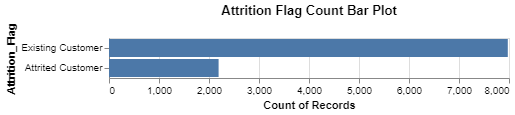

In [14]:
target_bar = alt.Chart(df,
                     title='Attrition Flag Count Bar Plot'
         ).mark_bar().encode(
                x='count(Attrition_Flag)',
                y=alt.Y('Attrition_Flag', sort='-x'),
)
target_bar

C:\Users\caesa_mt2kv9g\AppData\Local\Temp\ipykernel_23448\4167695493.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_target.corr(),annot=False, cmap='coolwarm',center=0,


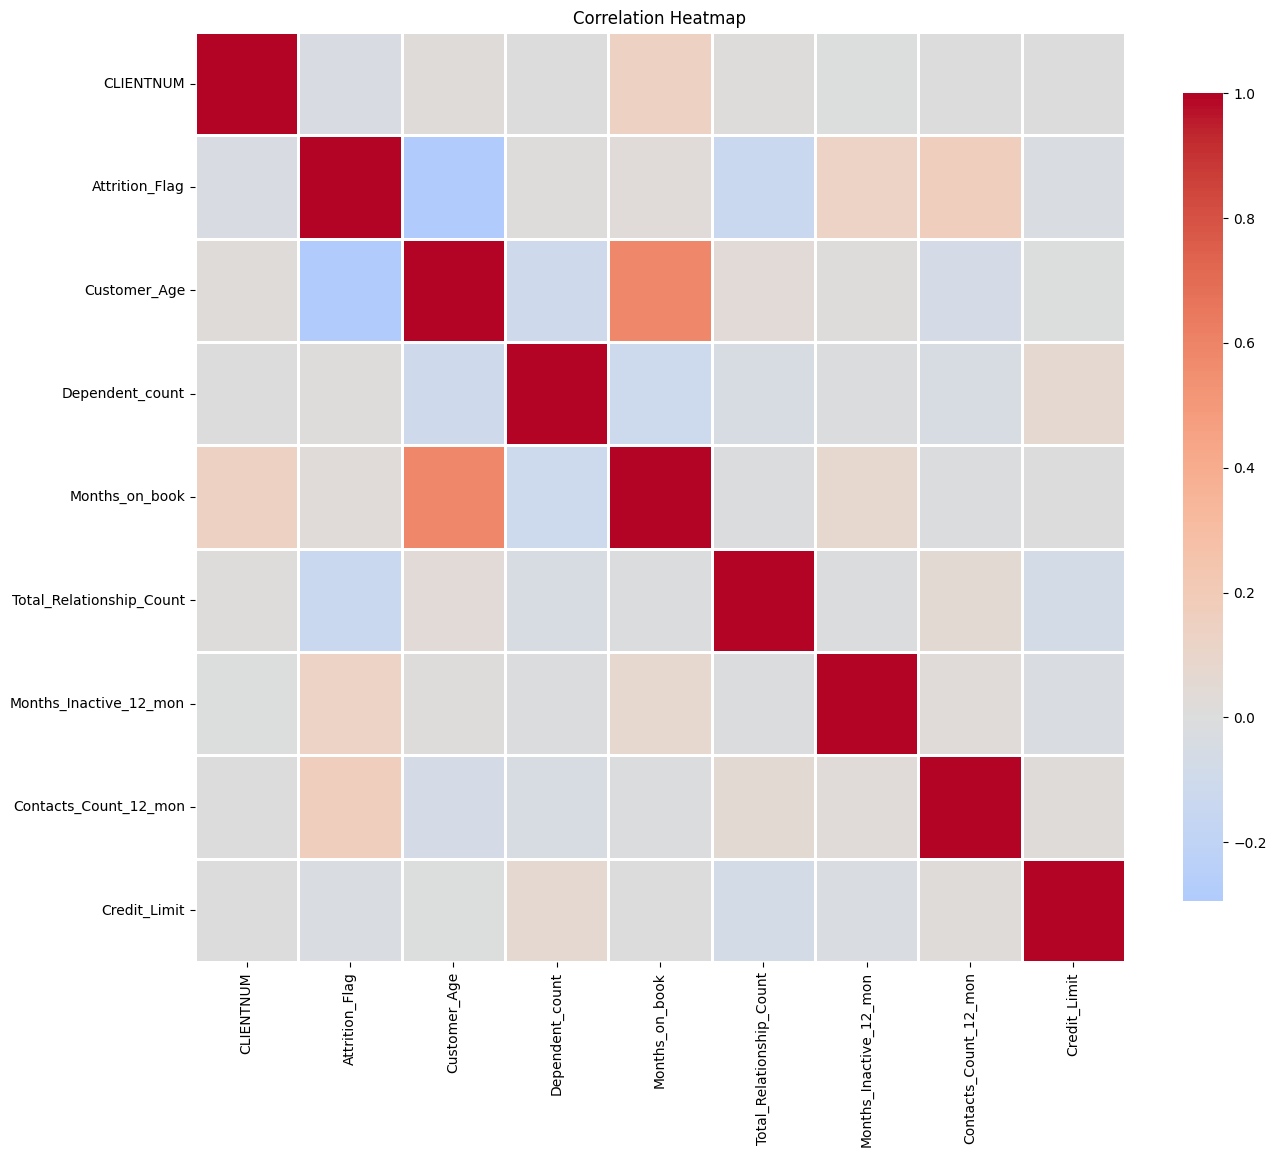

In [18]:
df_target = df.replace({'Attrition_Flag': {'Attrited Customer': 1, 'Existing Customer': 0}})

f = plt.figure(figsize=(15, 15))
sns.heatmap(df_target.corr(),annot=False, cmap='coolwarm',center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .7})
plt.title('Correlation Heatmap')
plt.show()

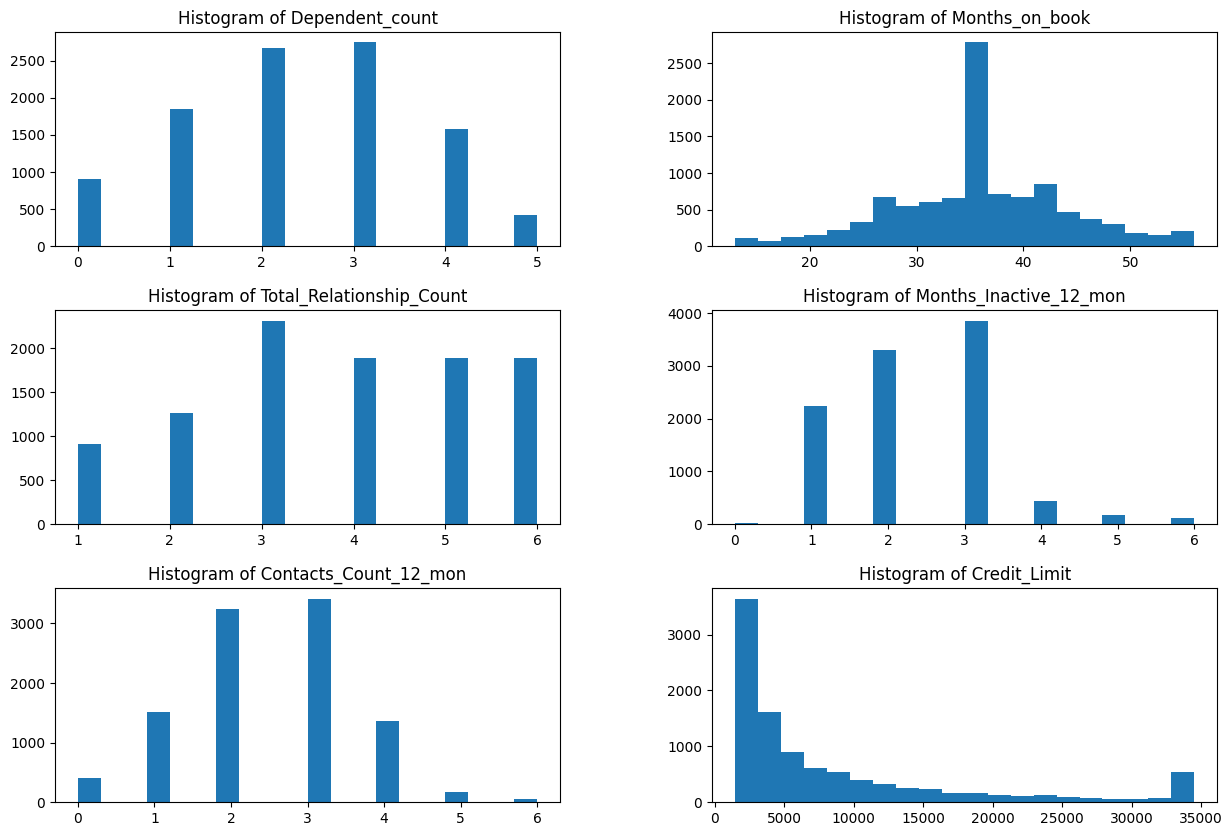

In [20]:
numeric_cols = ['Dependent_count',
                'Months_on_book',
                'Total_Relationship_Count', 
                'Months_Inactive_12_mon' ,
                'Contacts_Count_12_mon',
                'Credit_Limit'
        ]

fig, axs = plt.subplots(3,2, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.3)

axs = axs.ravel()

for i in range(0, len(numeric_cols)):

    axs[i].hist(df[numeric_cols[i]], bins=20)
    axs[i].set_title("Histogram of " + numeric_cols[i])

Text(0.5, 1.02, 'Pair Plot on Numeric Features by Target')

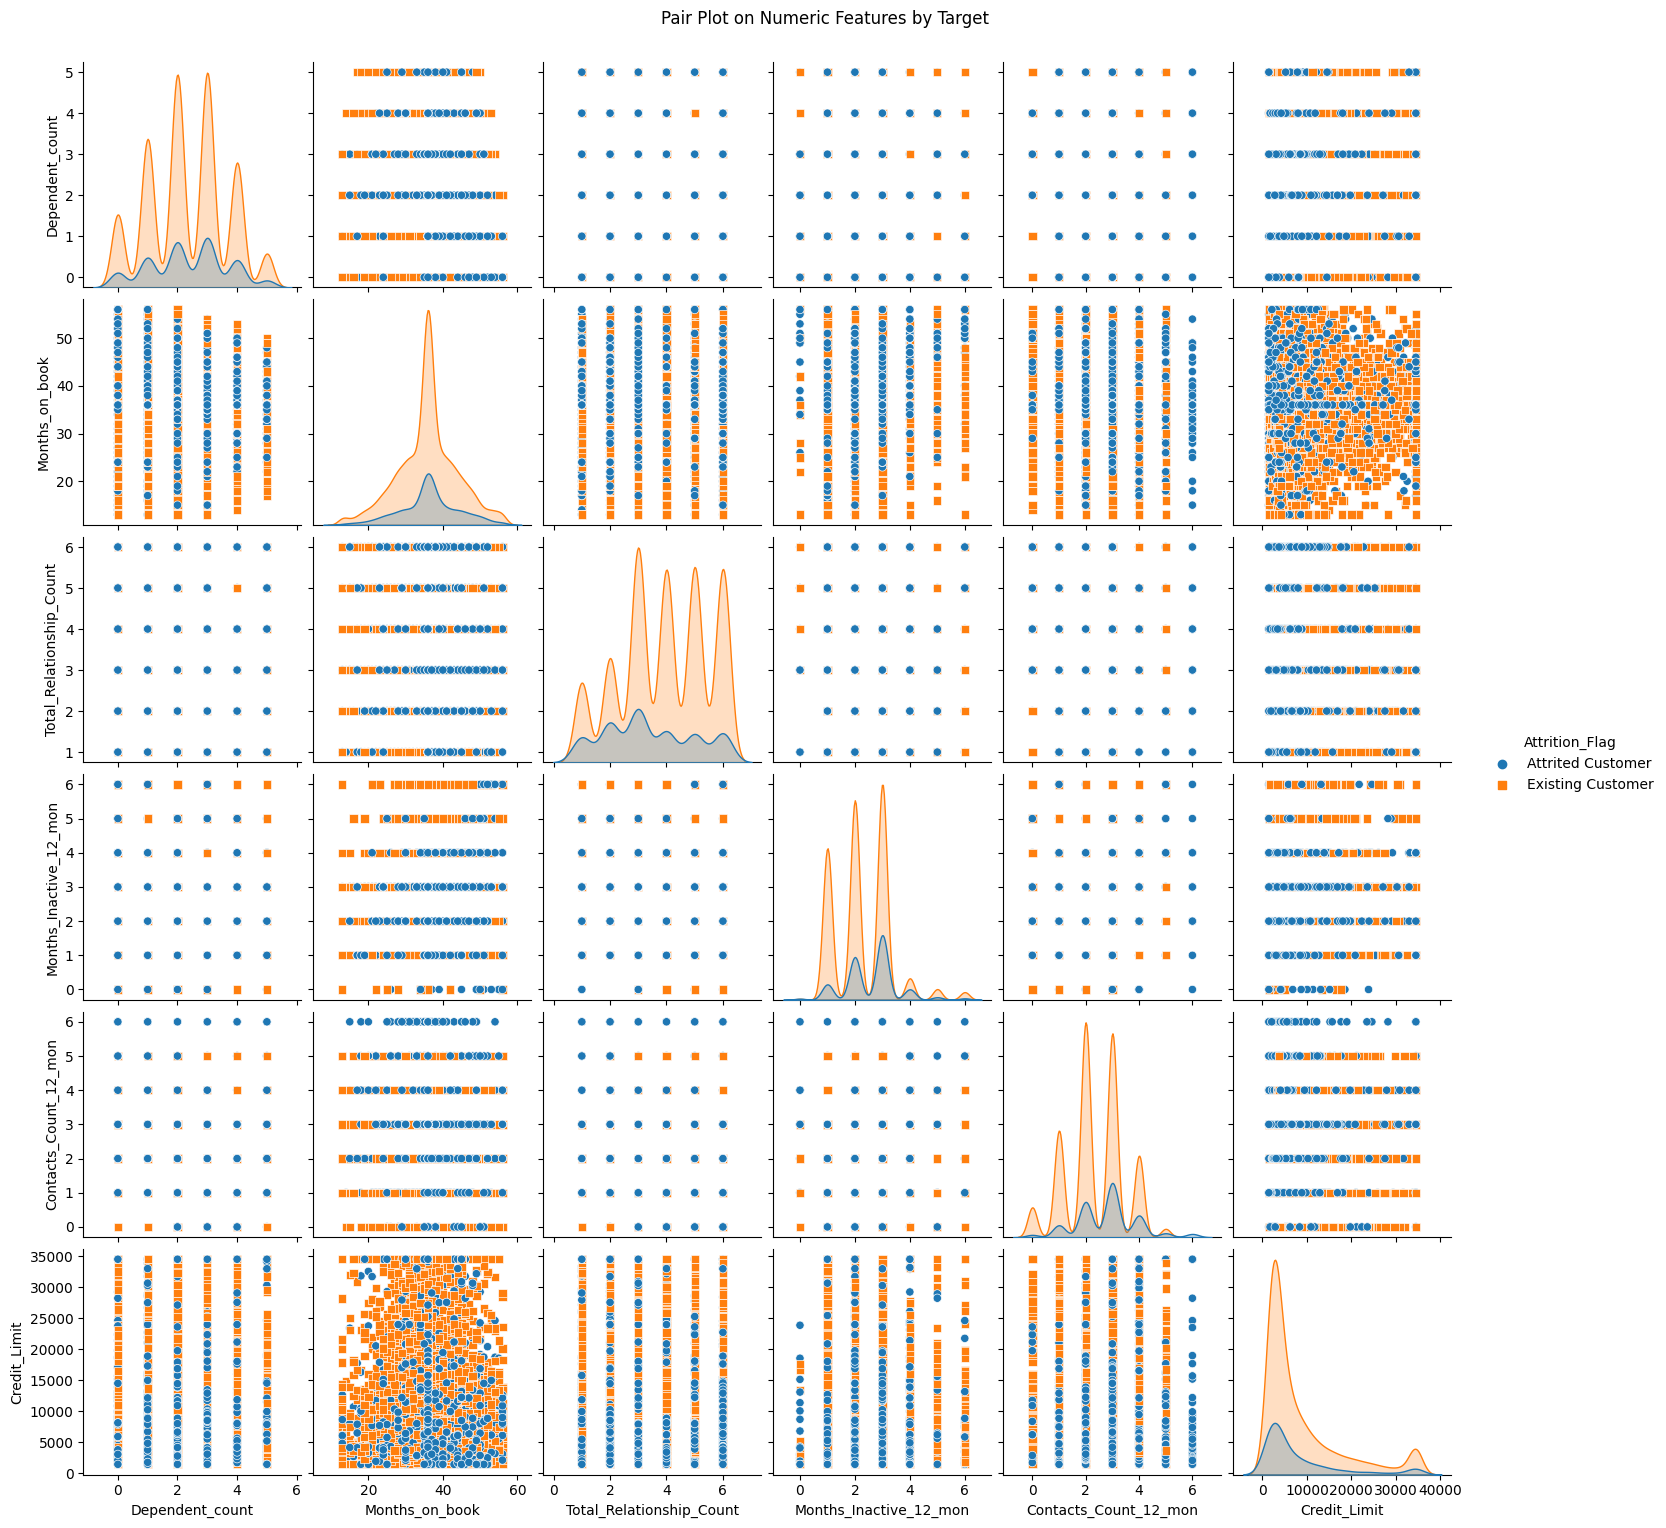

In [21]:
sns_pair = sns.pairplot(df[['Dependent_count',
                'Months_on_book',
                'Total_Relationship_Count', 
                'Months_Inactive_12_mon' ,
                'Contacts_Count_12_mon',
                'Credit_Limit', 'Attrition_Flag']],
            hue='Attrition_Flag', markers=["o", "s"])
sns_pair.fig.suptitle("Pair Plot on Numeric Features by Target", y=1.02)

C:\Users\caesa_mt2kv9g\.conda\envs\573\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


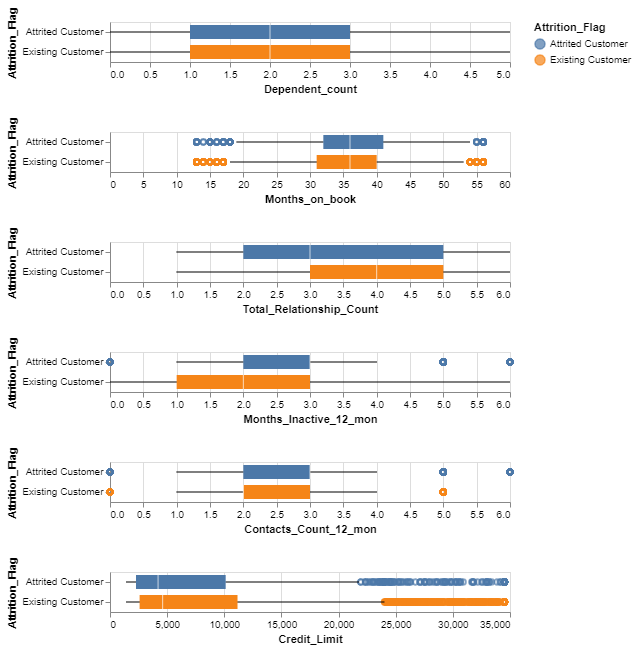

In [22]:
boxplot_col = ['Dependent_count',
                'Months_on_book',
                'Total_Relationship_Count', 
                'Months_Inactive_12_mon' ,
                'Contacts_Count_12_mon',
                'Credit_Limit']
  
boxplot = alt.Chart(df).mark_boxplot().encode(
    x=alt.X(alt.repeat(), type='quantitative'),
    y='Attrition_Flag',
    color='Attrition_Flag'
).repeat(repeat=boxplot_col, columns=1)


boxplot